In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Problem 1
## In this problem, we are given the format of the data and tasked with deducing the model that was used in generating it.

In [10]:
df = pd.read_csv("Problem1_1.txt", sep = " ", header=None)

In [37]:
df[:5]
df.columns = ['X','Y']

In [ ]:
# Visualizing the Data

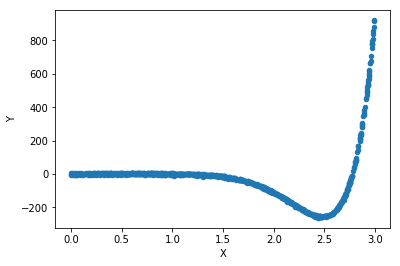

In [42]:
df.plot(x = 'X',y = 'Y', kind='scatter')
plt.show()

In [16]:
Xs = df['X']
Ys = df['Y']
X_array = np.asarray(Xs)
Y_array = np.asarray(Ys)

In [67]:
# Part 1: Naive Error Fitting
from numpy.polynomial import Polynomial
#z = Polynomial.fit(X_array, Y_array, 10)
z = np.polyfit(X_array, Y_array, 10)
#plt.plot(*z.linspace())
#plt.show()
# This returns a graph that looks very similar to the scatter plot from before.

In [139]:
z

array([ -5.28174496e-01,   9.29561637e+00,  -5.74651619e+01,
         1.85383366e+02,  -3.45717924e+02,   3.50291172e+02,
        -1.45312632e+02,  -3.47521535e+01,   4.68633501e+01,
        -8.27528326e+00,   2.09198522e-01])

In [68]:
y1 = np.polyval(z,Xs);

In [70]:
residuals = y1 - Ys

In [ ]:
# The Data seems to, rather clearly, follow the shape of a Beta Distribution.

In [ ]:
for resid in residuals:
    

In [76]:
print(np.median(residuals))
print(np.mean(residuals))

-0.739325603129
-1.4813110738032266e-11


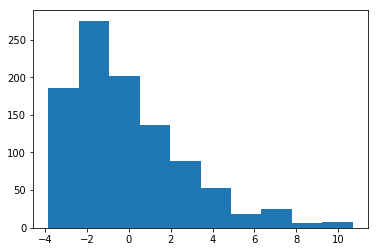

In [75]:
plt.hist(residuals)
plt.show()

In [152]:
import scipy.stats
print(min(residuals))
modifiedresiduals = []
for resid in residuals:
    resid = resid - min(residuals)
    modifiedresiduals.append(resid)

#scipy.stats.beta.fit(residuals, np.mean(residuals), np.var(residuals),floc=0., fscale=1.)


-3.83739483589


In [158]:
newresiduals = []
for resid in modifiedresiduals:
    resid = resid/max(modifiedresiduals)
    if(resid != 0.0 and resid != 1.0):
        newresiduals.append(resid)

In [156]:
print(min(newresiduals))

0.0


In [159]:
scipy.stats.beta.fit(newresiduals, np.mean(newresiduals), np.var(newresiduals),floc=0., fscale=1.)


(1.4426047880672799, 3.8202820303720881, 0.0, 1.0)

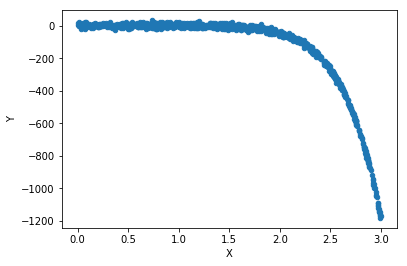

In [91]:
# Trying this Problem on Part 2:
df_2 = pd.read_csv("Problem1_2.txt", sep = " ", header=None)
df_2.columns = ['X','Y']
df_2.plot(x = 'X',y = 'Y', kind='scatter')
plt.show()

In [120]:
from numpy.polynomial import Polynomial
Xs2 = df_2['X']
Ys2 = df_2['Y']
X_array2 = np.asarray(Xs2)
Y_array2 = np.asarray(Ys2)
#z = Polynomial.fit(X_array, Y_array, 10)
z_2 = np.polyfit(X_array2, Y_array2, 10)

In [161]:
z_2

array([ -1.92344925e+00,   2.98116007e+01,  -1.98756594e+02,
         7.40209447e+02,  -1.68511357e+03,   2.39806146e+03,
        -2.08922919e+03,   1.03101488e+03,  -2.36198366e+02,
         1.33405846e+01,   1.48047243e+00])

In [102]:
X_test_a  = pd.read_csv('hw0p1a_test.csv' , header = None)
xtesta = X_test_a[0]
y1 = np.polyval(z,xtesta);

In [122]:
#for k in y1:
#    print(k)
for k in y2:
    print(k)

1.55689600777
1.60453718125
1.61795492657
1.67551089498
1.45197751845
0.757083266396
0.289703649288
0.207193123333
0.0487593868846
-0.043053670528
-0.107692798362
-0.112335379219
-0.11223851217
0.00785999274802
0.109846569211
0.133244465666
0.243942087924
0.296923215892
0.363155047022
0.436773296286
0.730656951944
0.951267731004
1.34211337879
1.76931615705
2.60972957268
2.61287382663
2.79071034674
2.80651311897
2.90142894417
2.90286727358
2.90156536107
2.61028631458
2.52857260332
2.50207038491
2.35747336137
2.34347786089
1.06065909923
1.04608081633
1.03577466103
0.863855265865
0.625330194591
0.296235392326
0.210183822065
0.19713119504
-0.346994261728
-0.731389910704
-0.795723168756
-1.48291779204
-1.62618834553
-1.89574971064
-2.7834966041
-2.86184606395
-4.84413846822
-6.55715458194
-6.59215062178
-8.58383160018
-10.2091373798
-12.4618944963
-14.4236129361
-14.4495934049
-15.4223630673
-16.2010022309
-17.1134115557
-18.1131468627
-24.7582344943
-29.9525342567
-51.1150809428
-60.427155

In [112]:
len(y)

100

In [97]:
X_test_b  = pd.read_csv('hw0p1b_test.csv' , header = None)

In [100]:
xtestb = X_test_b[0]

In [121]:
y2 = np.polyval(z_2,xtestb);

In [ ]:
# This seems to indicate that our error term has some distribution 

In [ ]:
# Part 2: Error Fitting with a Train-Test Split

In [90]:
X_train = X_array[:500]
X_test = X_array[500:]
Y_train = Y_array[:500]
Y_test = Y_array[500:]
z_train = np.polyfit(X_train, Y_train, 10)

In [32]:
z_train

array([ -5.63321771e+03,   4.09565960e+04,  -1.26272842e+05,
         2.14995975e+05,  -2.20569115e+05,   1.39535926e+05,
        -5.34364487e+04,   1.16146074e+04,  -1.23856468e+03,
         4.69582724e+01,  -2.64966846e-01])

In [ ]:
df_2.columns = ['X','Y']

In [ ]:
# Part 2: A second instance of the same operations as in Part 1

# Problem 2: 

## A more complicated version of the same problem, where we are not given as much info as before and need to deduce the functional form of the model.

That said, the data still gives the impression that a Polynomial Basis can likely be used to solve this problem.

In [88]:
df_Part_2 = pd.read_csv("Problem2.txt", sep = " ", header=None)
df_Part_2.columns = ['X','Y']


In [126]:
X_test_P2  = pd.read_csv('hw0p2_test.csv' , header = None)
Xtest_P2 = X_test_P2[0]

In [131]:
X_test_P2

,0
0,-1.479948
1,-1.476894
2,-1.451221
3,-1.419287
4,-1.361448
5,-1.355920
6,-1.347050
7,-1.316016
8,-1.301831
9,-1.291611


In [138]:
for k in y_P2:
    print(k)

-1.47994824083
-1.47689377198
-1.45122073954
-1.41928669884
-1.36144761843
-1.35591996963
-1.34704989271
-1.31601563208
-1.3018308606
-1.29161062773
-1.28919831884
-1.27638770372
-1.23376797183
-1.19751281308
-1.18996626881
-1.18702565299
-1.14961237105
-1.14490837715
-1.09406650021
-1.08348644311
-1.07968948235
-0.996855580553
-0.98013372748
-0.942022023945
-0.891600758859
-0.872782997131
-0.842026041341
-0.820856219979
-0.816954424945
-0.791765987425
-0.778726349099
-0.7559893592
-0.746422242852
-0.74227384708
-0.680344098669
-0.658999610696
-0.650148355581
-0.650129249737
-0.581885571692
-0.567751723435
-0.539972046498
-0.491491629351
-0.445075579973
-0.406069783117
-0.324693896589
-0.296213175774
-0.202037269174
-0.101994073751
-0.00907523629824
0.00394379399583
0.0526556450938
0.0596917548797
0.0814459271712
0.0955364295832
0.130436047215
0.141678915214
0.14452875203
0.150849355674
0.206117477226
0.223934189984
0.26426824447
0.297056445296
0.336081826831
0.388149320824
0.397068057

In [162]:
from numpy.polynomial import Polynomial
XsP2 = df_Part_2['X']
YsP2 = df_Part_2['Y']
X_arrayP2 = np.asarray(XsP2)
Y_arrayP2 = np.asarray(XsP2)
#z = Polynomial.fit(X_array, Y_array, 7)
z_P2 = np.polyfit(X_arrayP2, Y_arrayP2, 5)
y_P2 = np.polyval(z_P2,Xtest_P2);

z_P2

array([  1.25359863e-16,  -1.02418728e-16,   2.42232228e-17,
         9.20595265e-17,   1.00000000e+00,  -1.32892485e-17])

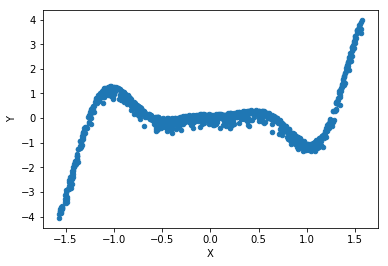

In [89]:
df_Part_2.plot(x = 'X',y = 'Y', kind='scatter')
plt.show()

In [ ]:
# First, lets try different Norms: From 1 to 10, and see how the Cross Validation Error varies with each of these norms.
for k in range(1,11):
    

In [ ]:
# Lets also try adding a few wrinkles to this model.

In [ ]:
# Problem 3: 
